<a href="https://colab.research.google.com/github/kameoman/pythonlesson/blob/main/%E7%94%BB%E5%83%8F%E3%81%8B%E3%82%89%E6%96%87%E5%AD%97%E3%82%92%E8%AA%8D%E8%AD%98%E3%81%99%E3%82%8BOCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
from PIL import Image
import pyocr

In [29]:
import cv2

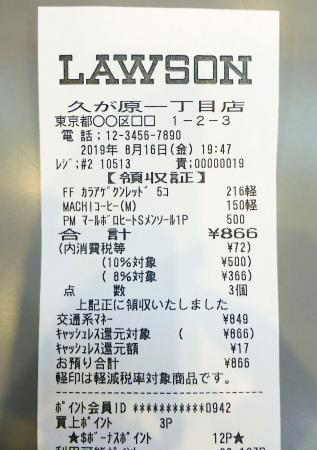

In [30]:
img1 = Image.open('01.jpg')
img1


In [31]:
tools =  pyocr.get_available_tools()
tools

[<module 'pyocr.libtesseract' from '/usr/local/lib/python3.7/dist-packages/pyocr/libtesseract/__init__.py'>]

In [32]:
len(tools)

1

In [34]:
tool = tools[0]
tool.get_name()

'Tesseract (C-API)'